## Install and load packages 

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [1]:
%%capture
!pip install -r ../requirements.txt


In [65]:
import pandas as pd
from statistics import mean
import matplotlib.pyplot as plt
%matplotlib inline
from pmlb import fetch_data
from statistics import mean
import numpy as np

In [66]:

import pandas as pd
law=pd.read_csv('../Data/law_school_clean.csv', sep=',')
X=law.drop(columns=[ 'pass_bar'])
y = law.loc[:, 'pass_bar']
X['race']=[1 if X.loc[i,'race']=='Non-White' else 0 for i in range(len(X))]
good_outcome=1
bad_outcome=0
sens_var='race'
sensitive_value=1
y.value_counts(normalize=True)

pass_bar
1.0    0.889749
0.0    0.110251
Name: proportion, dtype: float64

In [3]:
%run "../clean_functions.py"

pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[inFairness]'
pip install 'aif360[Reductions]'
pip install 'aif360[FairAdapt]'


In [70]:
model='xgb'
test_results, val_results=run_constraints_xgb(X,y, sens_var, sensitive_value)
test_metrics=run_all_results_clean(test_results, val_results, good_outcome)

Run biased model
The AUC of the biased model (validation set) is: 0.8648367335697993
The AUC of the biased model (test set) is: 0.870326156775373
The AUC of the biased model for the protected group (validation set) is: 0.8073600502402477
The AUC of the biased model for the privileged group (validation set) is: 0.8525113450035795
The AUC of the biased model for the protected group (test set) is: 0.8584437206992741
The AUC of the biased model for the privileged group (test set) is: 0.8474151067550953
Calculate demographic parity


100%|██████████| 100/100 [00:07<00:00, 12.58it/s]


Calculate equality of opportunity


100%|██████████| 100/100 [06:40<00:00,  4.00s/it]


Calculate accuracy


100%|██████████| 100/100 [00:00<00:00, 1848.47it/s]


Calculate precision


100%|██████████| 100/100 [00:00<00:00, 533.27it/s]


Calculate recall


100%|██████████| 100/100 [00:00<00:00, 579.02it/s]


In [71]:
print('Percentage of people in the protected group {}'.format(test_results.protected.mean()))
print('Percentage of people with the target value {}'.format(test_results.target.mean()))
print('The base rate disparity is {}'.format(test_results[test_results.protected==False].target.value_counts(normalize=True)[good_outcome] - test_results[test_results.protected==True].target.value_counts(normalize=True)[good_outcome]))


Percentage of people in the protected group 0.15903846153846155
Percentage of people with the target value 0.8898076923076923
The base rate disparity is 0.1982399416447691


In [80]:
# cost rounded to 3 digits after the comma
print('precision')
print('The average cost of fairness (DP) is {:.3f}'.format(mean([a - b for a, b in zip(test_metrics['prec_unfair'], test_metrics['prec_dp'])])))
print('The average cost of fairness (EO) is {:.3f}'.format(mean([a - b for a, b in zip(test_metrics['prec_unfair'], test_metrics['prec_eo'])])))
print('recall')
print('The average cost of fairness (DP) is {:.3f}'.format(mean([a - b for a, b in zip(test_metrics['rec_unfair'], test_metrics['rec_dp'])])))
print('The average cost of fairness (EO) is {:.3f}'.format(mean([a - b for a, b in zip(test_metrics['rec_unfair'], test_metrics['rec_eo'])])))
print('accuracy')
print('The average cost of fairness (DP) is {:.3f}'.format(mean([a - b for a, b in zip(test_metrics['acc_unfair'], test_metrics['acc_dp'])])))
print('The average cost of fairness (EO) is {:.3f}'.format(mean([a - b for a, b in zip(test_metrics['acc_unfair'], test_metrics['acc_eo'])])))

precision
The average cost of fairness (DP) is 0.005
The average cost of fairness (EO) is 0.003
recall
The average cost of fairness (DP) is 0.004
The average cost of fairness (EO) is 0.002
accuracy
The average cost of fairness (DP) is 0.007
The average cost of fairness (EO) is 0.004


In [81]:
# save results
import pickle

with open(f'Results/Law_test_results.pkl', 'wb') as f:
    pickle.dump(test_results, f)
with open(f'Results/Law_test_metrics.pkl', 'wb') as f:
    pickle.dump(test_metrics, f)

## Read results and visualize

In [75]:
# read results
import pickle
test_results = pd.read_pickle('Results/Law_test_results.pkl')
test_metrics = pd.read_pickle('Results/Law_test_metrics.pkl')

In [4]:
%run "../visualisations.py"

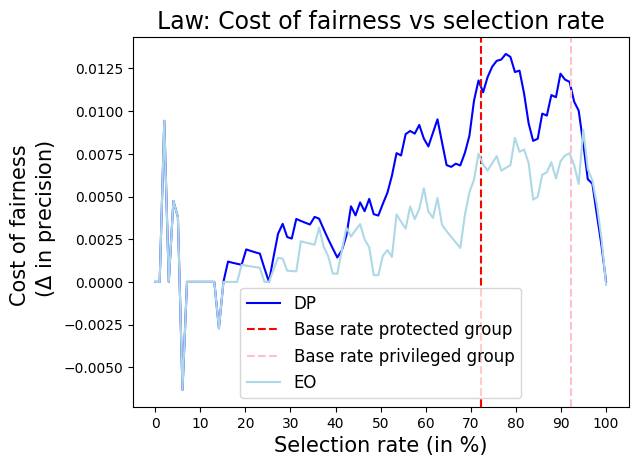

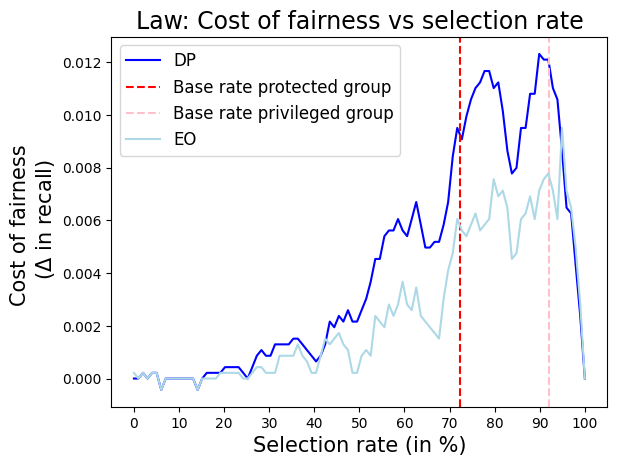

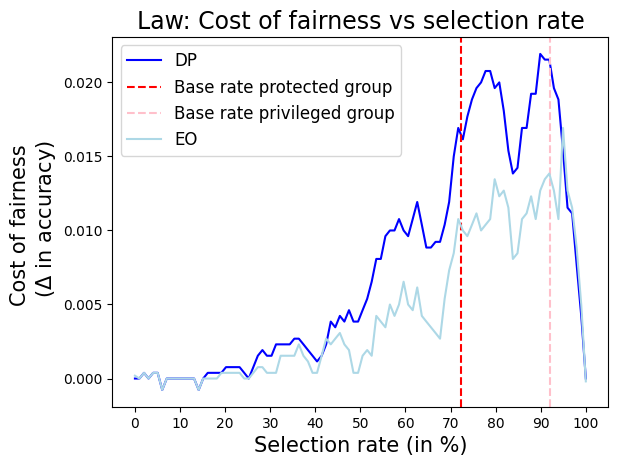

In [76]:
C_list=[i for i in np.linspace(start=1, stop=len(test_results), num=100, dtype=int)]
dataset='Law'
plot_cost(test_metrics['prec_unfair'],test_metrics['prec_dp'],C_list, test_results, 'precision', 'DP', dataset, test_metrics['prec_eo'], 'EO')   
plot_cost(test_metrics['rec_unfair'],test_metrics['rec_dp'],C_list, test_results, 'recall', 'DP', dataset, test_metrics['rec_eo'], 'EO') 
plot_cost(test_metrics['acc_unfair'],test_metrics['acc_dp'],C_list, test_results, 'accuracy', 'DP', dataset, test_metrics['acc_eo'], 'EO') 